# An end-to-end-scikit-learn-workflow

In [2]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 1. getting data ready
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
#splitting the dataframe into features and labels

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [12]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [14]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [16]:
# split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## making sure our dataset is all numerical

In [21]:
car_sales = pd.read_csv("https://raw.githubusercontent.com/AningDavid98/zero-to-mastery-ml/refs/heads/master/data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [23]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [25]:
len(car_sales)

1000

In [29]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [31]:
# split into X and y

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [33]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [35]:
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [37]:
# splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Honda'

In [41]:
# converting strings into numbers
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
categorical_features = ["Make", "Colour", "Doors"]
transform = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                              remainder="passthrough")
transformed_x = transform.fit_transform(X)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [47]:
# refitting our model
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
# evaluate the test
model.score(X_test, y_test)

0.3385921048142325

## what if there were missing values in our dataset
* either fill them with some values or remove the missing values from the dataset

In [61]:
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/AningDavid98/zero-to-mastery-ml/refs/heads/master/data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [63]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [71]:
# filling missing data with pandas
car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing")
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)

In [73]:
car_sales_missing = car_sales_missing.dropna(subset="Price")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [77]:
car_sales_missing.isna().sum(), len(car_sales_missing)

(Make             0
 Colour           0
 Odometer (KM)    0
 Doors            0
 Price            0
 dtype: int64,
 950)

In [79]:
# converting the data into numbers but first we have to split the data into features and labels
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [81]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [83]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")
transformed_x = transformer.fit_transform(X)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [85]:
X_train, X_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model=RandomForestRegressor()

In [87]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [89]:
model.score(X_test, y_test)

0.1415963821497601

## 2.choosing the right estimator/algorithm 

In [93]:
# picking a machine learning model for a regression problem
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [99]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [101]:
housing_df["Target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [103]:
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [105]:
# splitting the dataframe into X and y
X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

In [107]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [109]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Target, dtype: float64

In [111]:
X.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [113]:
y.dtypes

dtype('float64')

In [115]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [117]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)

Ridge()

In [119]:
model.score(X_test, y_test)

0.6175126856724147

In [122]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [124]:
model.score(X_test, y_test)

0.8071945578734945

In [126]:
# picking a machine learning model for classification problem
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [128]:
# splitting the data into X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [130]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [132]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [134]:
#splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [136]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [140]:
from sklearn.svm import LinearSVC
clf = LinearSVC(dual="auto")
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

In [142]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8032786885245902

## fitting the model to make predictions

In [145]:
#splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8360655737704918

## making predictions using machine learning model

In [148]:
# use the trained model to make predictions
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [150]:
np.array(y_test)

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [162]:
# compare predictions to truth labels to evaluate the model
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
acc = accuracy_score(y_test, y_pred)
acc

0.8360655737704918

In [164]:
recall = recall_score(y_test, y_pred)
recall

0.8333333333333334

In [166]:
f1 = f1_score(y_test, y_pred)
f1

0.8571428571428571

In [168]:
precision = precision_score(y_test, y_pred)
precision

0.8823529411764706

In [170]:
# making predictions with predict_proba
y_pred_prob = clf.predict_proba(X_test)
y_pred_prob

array([[0.97, 0.03],
       [0.91, 0.09],
       [0.09, 0.91],
       [0.81, 0.19],
       [0.74, 0.26],
       [0.93, 0.07],
       [0.32, 0.68],
       [0.89, 0.11],
       [0.69, 0.31],
       [0.  , 1.  ],
       [0.9 , 0.1 ],
       [1.  , 0.  ],
       [0.22, 0.78],
       [0.11, 0.89],
       [0.  , 1.  ],
       [0.54, 0.46],
       [0.11, 0.89],
       [0.34, 0.66],
       [0.34, 0.66],
       [0.79, 0.21],
       [0.76, 0.24],
       [0.42, 0.58],
       [0.1 , 0.9 ],
       [0.57, 0.43],
       [0.29, 0.71],
       [0.05, 0.95],
       [0.85, 0.15],
       [0.19, 0.81],
       [0.06, 0.94],
       [0.36, 0.64],
       [0.27, 0.73],
       [0.19, 0.81],
       [0.36, 0.64],
       [0.42, 0.58],
       [0.11, 0.89],
       [0.63, 0.37],
       [0.92, 0.08],
       [0.13, 0.87],
       [0.28, 0.72],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.86, 0.14],
       [0.99, 0.01],
       [0.53, 0.47],
       [0.75, 0.25],
       [0.05, 0.95],
       [0.04, 0.96],
       [0.78,

In [172]:
# making predictions on a regression problem
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [174]:
# splitting the data into X and y
X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

In [176]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [178]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Target, dtype: float64

In [180]:
# splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [182]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8136180722132811

In [184]:
y_pred = model.predict(X_test)
y_pred

array([0.83095  , 1.09851  , 2.1786601, ..., 1.80221  , 1.13283  ,
       0.99587  ])

In [188]:
np.array(y_test)

array([0.871, 1.016, 2.3  , ..., 1.829, 0.838, 0.883])

In [190]:
y_pred[:10]

array([0.83095  , 1.09851  , 2.1786601, 1.50997  , 1.81492  , 2.96897  ,
       3.9418109, 1.69509  , 3.9379704, 2.0079301])

In [192]:
np.array(y_test[:10])

array([0.871, 1.016, 2.3  , 1.588, 2.929, 3.141, 3.364, 1.821, 4.409,
       1.614])

In [194]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mae

0.3246780237887599

In [196]:
mse = mean_squared_error(y_test, y_pred)
mse

0.24599969418382744

## evaluating machine learning model

In [199]:
# evaluate a model with the score method
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

In [201]:
# using the score method on a regression problem
X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8128380494756627

## evaluating a model using the scoring parameter

In [204]:
# evaluate a model with the score method
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

In [206]:
from sklearn.model_selection import cross_val_score
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [208]:
cvs = cross_val_score(clf, X, y)
cvs

array([0.83606557, 0.90163934, 0.80327869, 0.8       , 0.75      ])

In [210]:
np.mean(cvs)

0.8181967213114755

In [212]:
# scoring parameter set to none
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.80327869, 0.90163934, 0.85245902, 0.8       , 0.73333333])

## classification model evaluation metrics
### accuracy

In [219]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
cvs = cross_val_score(clf, X, y)
cvs

array([0.83606557, 0.90163934, 0.80327869, 0.8       , 0.75      ])

In [221]:
np.mean(cvs)

0.8181967213114755

In [225]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cvs)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 81.82%


### area under receiver operating characteristic curve (AUC/ROC)

In [229]:
from sklearn.metrics import roc_curve
# make predictions with the classifier
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [231]:
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba

array([[0.79, 0.21],
       [0.49, 0.51],
       [0.44, 0.56],
       [1.  , 0.  ],
       [0.83, 0.17],
       [0.31, 0.69],
       [0.74, 0.26],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.95, 0.05],
       [0.39, 0.61],
       [0.08, 0.92],
       [0.95, 0.05],
       [0.02, 0.98],
       [0.05, 0.95],
       [0.27, 0.73],
       [0.7 , 0.3 ],
       [0.1 , 0.9 ],
       [0.94, 0.06],
       [0.35, 0.65],
       [0.11, 0.89],
       [0.73, 0.27],
       [0.82, 0.18],
       [0.74, 0.26],
       [0.26, 0.74],
       [0.52, 0.48],
       [0.84, 0.16],
       [0.63, 0.37],
       [0.1 , 0.9 ],
       [0.38, 0.62],
       [0.38, 0.62],
       [0.84, 0.16],
       [0.  , 1.  ],
       [0.23, 0.77],
       [0.02, 0.98],
       [0.53, 0.47],
       [0.85, 0.15],
       [0.03, 0.97],
       [0.88, 0.12],
       [0.76, 0.24],
       [0.31, 0.69],
       [0.53, 0.47],
       [0.08, 0.92],
       [0.84, 0.16],
       [0.53, 0.47],
       [0.35, 0.65],
       [0.21, 0.79],
       [0.48,

In [233]:
y_pred_proba_pos = y_pred_proba[:,1]
y_pred_proba_pos

array([0.21, 0.51, 0.56, 0.  , 0.17, 0.69, 0.26, 0.08, 0.04, 0.05, 0.61,
       0.92, 0.05, 0.98, 0.95, 0.73, 0.3 , 0.9 , 0.06, 0.65, 0.89, 0.27,
       0.18, 0.26, 0.74, 0.48, 0.16, 0.37, 0.9 , 0.62, 0.62, 0.16, 1.  ,
       0.77, 0.98, 0.47, 0.15, 0.97, 0.12, 0.24, 0.69, 0.47, 0.92, 0.16,
       0.47, 0.65, 0.79, 0.52, 0.08, 0.74, 0.94, 0.63, 0.96, 0.73, 0.99,
       0.13, 0.74, 0.8 , 0.78, 0.96, 0.73])

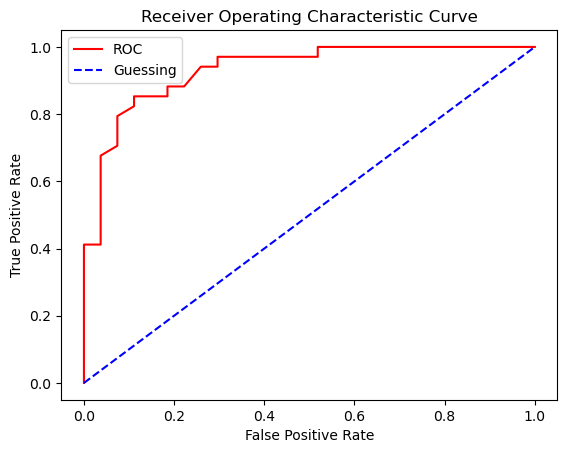

In [237]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pos)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, label="ROC", c="red")
    plt.plot([0,1], [0,1], label="Guessing", c="blue", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [239]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba_pos)

0.9324618736383442

In [241]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[22,  5],
       [ 4, 30]], dtype=int64)

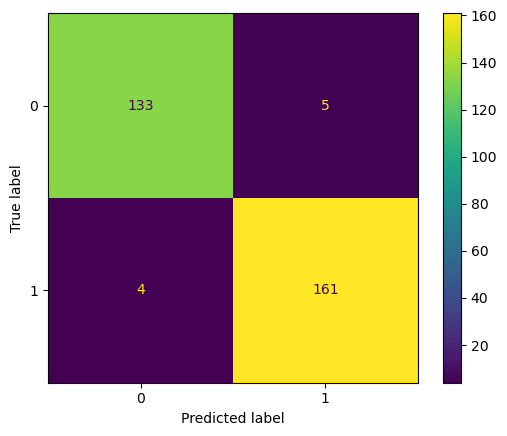

In [249]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X, y);

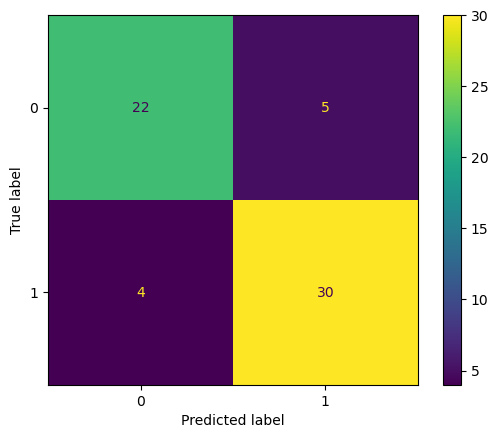

In [247]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [251]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## regression model evaluation metrics

In [256]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(0)

X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7977255079192124

In [258]:
y_pred = model.predict(X_test)
y_pred

array([1.41548  , 2.50677  , 1.46188  , ..., 1.51764  , 2.8108901,
       1.81979  ])

In [260]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7977255079192124

In [262]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mae

0.3354283504118218

In [264]:
mse = mean_squared_error(y_test, y_pred)
mse

0.2637568155619745

## using the scoring parameter

In [269]:
# starting with a classification problem

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

In [283]:
acc = cross_val_score(clf, X, y, scoring="accuracy")
np.mean(acc)

0.818360655737705

In [285]:
precision = cross_val_score(clf, X, y, scoring="precision")
np.mean(precision)

0.8331281833616299

In [287]:
f1 = cross_val_score(clf, X, y, scoring="f1")
np.mean(f1)

0.8320005503104093

In [289]:
recall = cross_val_score(clf, X, y, scoring="recall")
np.mean(recall)

0.8666666666666666

In [ ]:
# scoring parameter for a regression problem
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(0)

X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
cvs = cross_val_score(model, X, y, scoring=None)
cvs

In [ ]:
cv_mae = cross_val_score(model, X, y, scoring="neg_mean_absolute_error")
cv_mae

In [ ]:
cv_mse = cross_val_score(model, X, y, scoring="neg_mean_squarred_error")
cv_mse

In [ ]:
model.score(X_test, y_test)